<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Функции" data-toc-modified-id="Функции-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Функции</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предварительный-анализ-данных" data-toc-modified-id="Предварительный-анализ-данных-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Предварительный анализ данных</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Очистка-и-лемматизация" data-toc-modified-id="Очистка-и-лемматизация-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Очистка и лемматизация</a></span></li><li><span><a href="#Деление-на-выборки" data-toc-modified-id="Деление-на-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Деление на выборки</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выбор модели</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

**Цель исследования** — на основе набора данных с разметкой о токсичности правок интернет-магазина «Викишоп» необходимо создать модель, классифицирующую комментарии на позитивные и негативные. Это необходимо для нового сервиса интернет-магазина: теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

**Ход исследования**

Исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Анализ данных.
 3. Подготовка данных.
 4. Построение и обучение моделей.
 5. Тестирование.

**Описание данных:**

Набор данных находится в файле `/datasets/toxic_comments.csv`

- **Признаки**

`text` — текст комментария

- **Целевой признак**

`toxic` — токсичность комментария

**Требования:**

Значение метрики качества *F1* должно быть не меньше 0.75. 

## Подготовка данных

### Загрузка библиотек

In [1]:
!pip install -U imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import os
import re
import nltk
import spacy
from matplotlib import rcParams, rcParamsDefault
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, roc_curve, precision_recall_curve
from sklearn.utils import shuffle
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from nltk.corpus import stopwords as nltk_stopwords

rcParams['figure.figsize'] = 10,6

In [3]:
pd.options.mode.chained_assignment = None # убираем предупреждение SettingWithCopy

In [4]:
MY_RANDOM_STATE = np.random.seed(12345)

### Функции

Функция для балансировки классов методом Downsample.

In [6]:
# функция, которая сбалансирует выборку техникой downsampling
def downsample(features, target, fraction):
    '''
    Функция принимает признаки и целевой признак, а так же значение для параметра frac и возвращает уменьшенную выборку
    со сбалансированными классами методом Downsample 
    features - признаки
    target - цлевой признак
    fraction - значение для параметра frac
    Return:
    features_downsampled - признаки со сбалансированными классами
    target_downsampled - целевой признак со сбалансированным классом
    '''
    features_zeros = features[target == 0] # выделим признаки отрицательного класса
    features_ones = features[target == 1] # выделим признаки положительного класса
    target_zeros = target[target == 0] # выделим целевой признак отрицательного класса
    target_ones = target[target == 1] # выделим целевой признак положительного класса
    # уменьшим отрицательный класс и объединим с положительным
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=MY_RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=MY_RANDOM_STATE)] + [target_ones])    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=MY_RANDOM_STATE) # перемешаем данные 
    return features_downsampled, target_downsampled

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Функция для очистки данных-текста.

In [7]:
def clear_text(text):
    '''
    Функция принимает датафрейм для очистки и возвращает датафрейм с очищенными данными-текстами
    data - датафрейм
    Return:
    text - датафрейм с очищенными данными
    '''
    # заменяем все символ, кроме указанных в паттерне на пробелы
    text = re.sub(r'[^A-Za-z\' ]', ' ', text.lower())
    # удаляем лишние пробелы - делим текст по пробелам, а затем опять объединяем через один пробел
    text = text.split()
    return " ".join(text)

Функция для лемматизации.

In [8]:
def lemmatize(text):
    '''
    Функция принимает текст для лемматизации и возвращает лемматизированный текст
    text - текст для лемматизации
    '''
    # лемматизируем слова переданного текста и снорва их объединим
    return " ".join([token.lemma_ for token in nlp(text)])

Функция для обучения моделей и подбора гиперпараметров.

In [9]:
def training(model, params, features_train, target_train):
    '''
    Функция принимает модель, гиперпараметры для поиска наилучших, признаки обучающей выборки, 
    целевой признак обучающей выборки, производит подбор наилучших гиперпараметров кросс-валидацией с помощью
    GridSearchCV, обучает модель и возвращает обученную модель
    model - модель
    params - гиперпараметры для поиска наилучших
    features_train - признаки обучающей выборки
    target_train - целевой признак обучающей выборки
    Return:
    grid - обученная модель
    '''
    # создаем экземпляр GridSearchCV
    grid = GridSearchCV(estimator=model,
                          param_grid=params,
                          scoring='f1',
                          cv=3,
                          verbose=3)
    # запускаем обучение
    grid.fit(features_train, target_train)
    # выводим на экран наилучшие гиперпараметры и метрику F1
    print('Лучший результат:', grid.best_score_)
    print('Лучшие параметры:', grid.best_params_)
    return grid

Функция, которая подбирает оптимальный порог для модели и строит PR-кривую и ROC-кривую. Так же функция сохраняет лучшие метрики F1 в список для дальнейшей сводной таблицы.

In [10]:
def ml_threshold(model, data_list, score_list, threshold_list = None):
    '''
    Функция принимает в параметры модель, датасеты, и подбирает оптимальный порог, выводит лучшие метрики метрики, 
    и PR-кривую, ROC-кривую.
    model - модель;
    data_list - список, содержащий датасеты [features_valid, target_valid];
    score_list - список, куда будут сохранены оценки (f1);
    threshold_list - список, сохраняющий лучшее значение порога.
    
    '''
    predictions = model.predict_proba(data_list[0])# найдем вероятности классов
    probabilities_one_valid = predictions[:, 1] # вероятность положительного класса
    best_score = 0
    best_threshold = 0
    
    # цикл на перебор порога и вывод результатов на экран
    print('Статистика модели')
    for threshold in np.arange(0, 0.9, 0.02):
        predicted_valid = probabilities_one_valid > threshold # находим вероятности больше порога
        # вычисляем метрики
        precision = precision_score(data_list[1], predicted_valid)
        recall = recall_score(data_list[1], predicted_valid)
        result = f1_score(data_list[1], predicted_valid)
        print('Порог = {:.2f} | F1-мера = {:.3f}'.format(
             threshold, result))
        if best_score < result:
            best_score = result
            best_threshold = threshold
    
    roc_auc = roc_auc_score(data_list[1], predictions[:, 1])
    # вывод оценок
    print()
    print('Лучшие оценки модели')
    print(f'F1: {best_score:.4}')
    print(f'AUC-ROC: {roc_auc:.4}') 
    print('Лучшее значение порога:', round(best_threshold, 2)) 
    print('_' * 40)
    print()
    print()
    
    # дополнение списка оценок
    score_list.append(round(best_score, 4))
    
    if threshold_list is not None:
        threshold_list.append(round(best_threshold, 4))
        
    # построим PR-кривую
    precision, recall, thresholds = precision_recall_curve(
        data_list[1], predictions[:, 1]
    )    
    plt.figure(figsize=(10, 10))
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('PR-кривая')
     
    # построим ROC-кривую
    fpr, tpr, thresholds = roc_curve(data_list[1], predictions[:, 1])
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, linestyle='-')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
   
    plt.show()

### Обзор данных

#### Загрузка данных

Считаем данные из csv-файла `/datasets/toxic_comments.csv` в датафрейм и сохраним в переменную `data`.

In [11]:
# чтение файла с данными и сохранение в data
pth1 = '/datasets/toxic_comments.csv'
pth2 = 'https://code.s3.yandex.net/datasets/toxic_comments.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, index_col=[0], parse_dates=[0])
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, index_col=[0], parse_dates=[0])
else:
    print('Something is wrong')

#### Предварительный анализ данных

Проверим размерность датасета.

In [12]:
# посмотрим на размер датасета
data.shape

(159292, 2)

Выведем случайные 10 строчек на экран.

In [13]:
# получение случайных 10 строк таблицы data
data.sample(n=10)

,text,toxic
109583,Expert Categorizers \n\nWhy is there no menti...,0
105077,"""\n\n Noise \n\nfart* talk. """,1
82244,"An indefinite block is appropriate, even for a...",0
18740,I don't understand why we have a screenshot of...,0
128310,"Hello! Some of the people, places or things yo...",0
108406,"""::::::::::::::If you read carefully, my comme...",1
25283,"""\nDid you make it at WP:AE? ofShalott """,0
32695,know as much as he thinks.,0
31936,Thank you for your comment and willingness to ...,0
20244,UPDATE 3-12-06\n\nHEY YALL IM GOING TO BE GONE...,0


Видим, что данные данные в столбце `text` требуют очистки, а целевой признак `toxic` необходимо проверить на баланс классов.

Выведем основную информацию о датафрейме.

In [14]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


Посмотрим распределение целевого признака.

In [16]:
# распределение целевого признака
pd.Series(data['toxic']).value_counts(normalize=True)

0    0.898388
1    0.101612
Name: toxic, dtype: float64

Построим график.

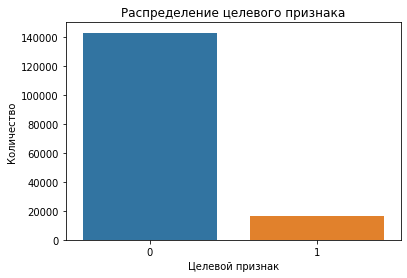

In [17]:
# Bar plot для целевого признака
plt.figure(figsize=(6, 4))
sns.countplot(x=pd.Series(data['toxic']))
plt.xlabel('Целевой признак')
plt.ylabel('Количество')
plt.title('Распределение целевого признака')
plt.show()

Мы обнаружили серьёзный дисбаланс при исследовании данных.

Проверка данных на пропуски.

In [18]:
# суммарное количество пропусков в датафрейме data
data.isnull().sum()

text     0
toxic    0
dtype: int64

 Пропусков в датафрейме нет. Посмотрим на количество полных дубликатов.


In [19]:
# проверим данные на дубликаты
data.duplicated().sum()

0

Дубликатов так же нет.

**Выводы:** 
1. Датафрейм содержит 159292 объекта без пропусков и 2 признака. Признак `text` содержит исходные тексты твитов, является не целевым и будет использован в обучении и предсказании. Признак `toxic` содержит данные по классификации текстов и явялется целевым.
2. Признак `toxic` содержит только 0 и 1, но, при этом, имеет тип данных `int64`, его можно оптимизировать до `uint8`.
3. Наблюдается дисбаланс классов - в признаке `toxic` содержится только 10% единиц, все остальное - нули.
4. Дубликатов, отрицательных значений, пропусков не обнаружено.

## Обучение

### Очистка и лемматизация

Теперь необходимо очистить текст от постороних символов и провести лемматизацию слов (написанные для этого функции в разделе Функции):

1. Очистку будем производить с помощью библиотеки regular expression (re): оставим прописные и строчные буквы английского алфавита (A-Z, a-z), а так же апостроф и пробел, остальное удалим.
2. Лемматизацию будем проводить с помощью библиотеки `spaCy` - эта библиотека работает с предварительно созданными моделями, которые необходимо сначала установить. Мы используем модель `en_core_web_sm` для английского языка. Загрузим эту библиотеку (при загрузке отключим некоторые компоненты, так как нам необходим только лемматизатор).

In [20]:
# загрузим модель en_core_web_sm
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

Перед очисткой текста и лемматизацией слов проверим наши функции - выведем исходный и обработанный текст (посмотрим на 10 строку).

In [21]:
# выведем одну строку исходного текста
print(
    "Исходный текст:",
    data["text"].reset_index(drop=True)[10],
)
# выведем один очищенный и лемматизированный текст
print(
    "\nОчищенный и лемматизированный текст:",
    lemmatize(
        clear_text(data["text"].reset_index(drop=True)[10])
    ),
)

Исходный текст: "
Fair use rationale for Image:Wonju.jpg

Thanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.

Please go to the image description page and edit it to include a fair use rationale.

If you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of 'image' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking 

Функции работают корректно. Теперь проведем очистку и лемматизацию текста.

In [22]:
%%time
data["text_lemmatize"] = data['text'].apply(lambda x: lemmatize(clear_text(x))).values

CPU times: user 15min 18s, sys: 1.57 s, total: 15min 20s
Wall time: 15min 20s


Проверим наличие дубликатов.

In [23]:
# проверим данные на дубликаты
data["text_lemmatize"].duplicated().sum()

1303

Удалим дубликаты.

In [24]:
#удаление строк-дубликатов
data = data.drop_duplicates(['text_lemmatize'])

In [25]:
data.head()

,text,toxic,text_lemmatize
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edit make under my usernam...
1,D'aww! He matches this background colour I'm s...,0,d'aww he match this background colour I be see...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man I be really not try to edit war it be ...
3,"""\nMore\nI can't make any real suggestions on ...",0,more I can not make any real suggestion on imp...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...


### Деление на выборки

Разделим данные с учётом стратификации на 3 выборки: тренировочную, валидационную и тестовую в соотношении 3:1:1.

Запишем в отдельные переменные признаки и целевой признак. Целевой признак - `toxic` - запишем его в переменную `target`, признак `text` в переменную `features`.

In [26]:
# запишем в переменную target целевой признак 
target = data['toxic']
# запишем в переменную features признаки 
features = data['text_lemmatize']

In [27]:
# отделим 40% данных для тестовой и валидационной выборок с учётом стратификации
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, stratify = target, random_state=MY_RANDOM_STATE)

In [28]:
# отделим 20% данных для тестовой выборки с учётом стратификации
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, stratify = target_valid_test, 
    random_state=MY_RANDOM_STATE)

Проверим размерность получившихся выборок, чтобы убедиться, что разделение на 3 выборки прошло корректно.

In [29]:
print('Обучающая выборка')
print(features_train.shape)
print(target_train.shape)
print()
print('Валидационная выборка')
print(features_valid.shape)
print(target_valid.shape)
print()
print('Тестовая выборка')
print(features_test.shape)
print(target_test.shape)
print()

Обучающая выборка
(94793,)
(94793,)

Валидационная выборка
(31598,)
(31598,)

Тестовая выборка
(31598,)
(31598,)



Размерность выборок получилась 3:1:1, разделение прошло корректно.

### Обучение моделей

Как выяснили в предыдущем разделе, в выборке наблюдается дисбаланс классов. Для работы с несбалансированными классами воспользуемся библиотекой `imblearn`.

Для обучения моделей применим величины TF-IDF как признаки. Очистим мешок слов от слова без смысловой нагрузки - стоп-слова. Для этого загрузим список стоп-слов из пакета stopwords, который находится в модуле nltk.corpus библиотеки nltk.

In [41]:
# загрузка стоп-слов
nltk.download("stopwords")
stopwords = set(nltk_stopwords.words("english"))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### LogisticRegression

Обучим модель логистической регрессии и посчитаем метрику F1.

In [43]:
%%time
# рассчитаем модель логистической регрессии
# инициализация параметров для GridSearchCV
params_lr = {}
# создайем  pipline с шагами подсчета TF-IDF и балансировкой классов
model_lr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=list(stopwords))),
    ('random_under_sampler', RandomUnderSampler(random_state=MY_RANDOM_STATE)),
    ('classification', LogisticRegression(random_state=MY_RANDOM_STATE))
])
# запускаем функцию для подбора гиперпараметров и обучения модели
grid_model_lr = training(model_lr, params_lr, features_train, target_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................................., score=0.687 total time=  11.6s
[CV 2/3] END ..................................., score=0.676 total time=  11.6s
[CV 3/3] END ..................................., score=0.686 total time=  14.9s
Лучший результат: 0.6828216960442614
Лучшие параметры: {}
CPU times: user 30.9 s, sys: 18.2 s, total: 49.2 s
Wall time: 49.3 s


Попробуем найти оптимальный порог классификации для логистической регрессии. Переберем значения порогов от 0 до 0.9 с шагом 0.02 и найдем для каждого значения метрики: точность, полноту, F1-меру и AUC-ROC. Построим PR-кривую и ROC-кривую.

In [44]:
# создадим список для сохранения F1-метрики и порога
f1_score_list = []
threshold_list = []

Статистика модели
Порог = 0.00 | F1-мера = 0.184
Порог = 0.02 | F1-мера = 0.191
Порог = 0.04 | F1-мера = 0.200
Порог = 0.06 | F1-мера = 0.211
Порог = 0.08 | F1-мера = 0.225
Порог = 0.10 | F1-мера = 0.240
Порог = 0.12 | F1-мера = 0.257
Порог = 0.14 | F1-мера = 0.276
Порог = 0.16 | F1-мера = 0.296
Порог = 0.18 | F1-мера = 0.316
Порог = 0.20 | F1-мера = 0.340
Порог = 0.22 | F1-мера = 0.363
Порог = 0.24 | F1-мера = 0.388
Порог = 0.26 | F1-мера = 0.415
Порог = 0.28 | F1-мера = 0.441
Порог = 0.30 | F1-мера = 0.469
Порог = 0.32 | F1-мера = 0.495
Порог = 0.34 | F1-мера = 0.521
Порог = 0.36 | F1-мера = 0.546
Порог = 0.38 | F1-мера = 0.573
Порог = 0.40 | F1-мера = 0.600
Порог = 0.42 | F1-мера = 0.624
Порог = 0.44 | F1-мера = 0.643
Порог = 0.46 | F1-мера = 0.660
Порог = 0.48 | F1-мера = 0.675
Порог = 0.50 | F1-мера = 0.690
Порог = 0.52 | F1-мера = 0.705
Порог = 0.54 | F1-мера = 0.716
Порог = 0.56 | F1-мера = 0.727
Порог = 0.58 | F1-мера = 0.738
Порог = 0.60 | F1-мера = 0.745
Порог = 0.62 | F1-мер

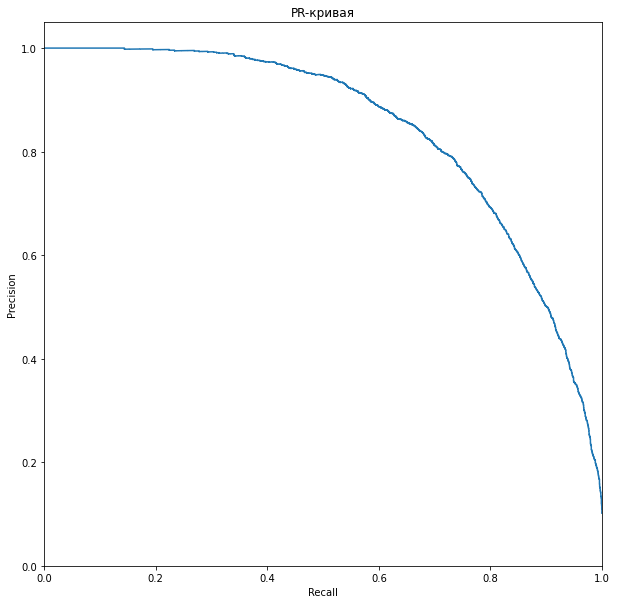

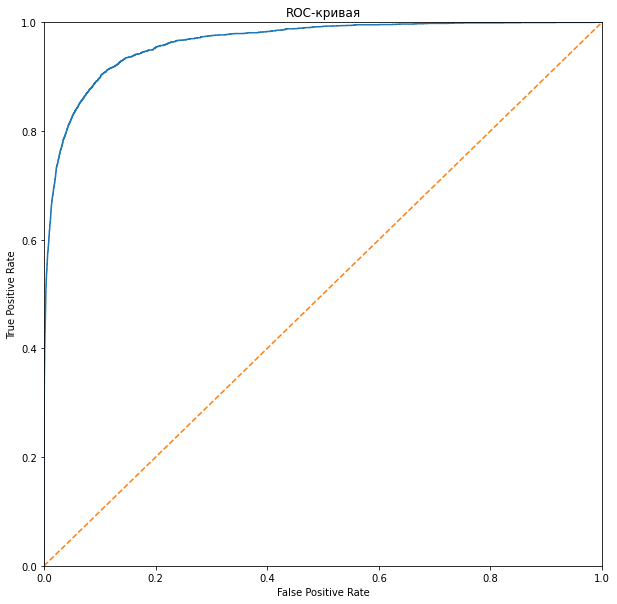

In [45]:
# вызовем функцию для подбора порога и построения PR-кривой и ROC-кривой
ml_threshold(grid_model_lr, [features_valid, target_valid], f1_score_list, threshold_list)

#### DecisionTreeClassifier

Обучим модели дерево решений, при этом меняя гиперпараметр  - `max_depth` - глубина дерева. Переберем значения от 1 до 20.

In [47]:
%%time
# рассчитаем модель логистической регрессии на уменьшенной выборке
# инициализация параметров для GridSearchCV
params_dt = {"classification__max_depth": range(1,21)}
model_dt = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=list(stopwords))),
    ('random_under_sampler', RandomUnderSampler(random_state=MY_RANDOM_STATE)),
    ('classification', DecisionTreeClassifier(random_state=MY_RANDOM_STATE))
])
# запускаем функцию для подбора гиперпараметров и обучения модели
grid_model_dt = training(model_dt, params_dt, features_train, target_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END .......classification__max_depth=1;, score=0.284 total time=   4.4s
[CV 2/3] END .......classification__max_depth=1;, score=0.300 total time=   4.4s
[CV 3/3] END .......classification__max_depth=1;, score=0.285 total time=   4.4s
[CV 1/3] END .......classification__max_depth=2;, score=0.218 total time=   4.4s
[CV 2/3] END .......classification__max_depth=2;, score=0.218 total time=   4.4s
[CV 3/3] END .......classification__max_depth=2;, score=0.217 total time=   4.3s
[CV 1/3] END .......classification__max_depth=3;, score=0.236 total time=   4.4s
[CV 2/3] END .......classification__max_depth=3;, score=0.375 total time=   4.4s
[CV 3/3] END .......classification__max_depth=3;, score=0.361 total time=   4.5s
[CV 1/3] END .......classification__max_depth=4;, score=0.237 total time=   4.5s
[CV 2/3] END .......classification__max_depth=4;, score=0.428 total time=   4.4s
[CV 3/3] END .......classification__max_depth=4;

Подберем порог

Статистика модели
Порог = 0.00 | F1-мера = 0.184
Порог = 0.02 | F1-мера = 0.184
Порог = 0.04 | F1-мера = 0.184
Порог = 0.06 | F1-мера = 0.184
Порог = 0.08 | F1-мера = 0.196
Порог = 0.10 | F1-мера = 0.196
Порог = 0.12 | F1-мера = 0.241
Порог = 0.14 | F1-мера = 0.250
Порог = 0.16 | F1-мера = 0.250
Порог = 0.18 | F1-мера = 0.275
Порог = 0.20 | F1-мера = 0.275
Порог = 0.22 | F1-мера = 0.275
Порог = 0.24 | F1-мера = 0.275
Порог = 0.26 | F1-мера = 0.275
Порог = 0.28 | F1-мера = 0.275
Порог = 0.30 | F1-мера = 0.275
Порог = 0.32 | F1-мера = 0.275
Порог = 0.34 | F1-мера = 0.275
Порог = 0.36 | F1-мера = 0.275
Порог = 0.38 | F1-мера = 0.275
Порог = 0.40 | F1-мера = 0.275
Порог = 0.42 | F1-мера = 0.275
Порог = 0.44 | F1-мера = 0.622
Порог = 0.46 | F1-мера = 0.622
Порог = 0.48 | F1-мера = 0.622
Порог = 0.50 | F1-мера = 0.622
Порог = 0.52 | F1-мера = 0.622
Порог = 0.54 | F1-мера = 0.622
Порог = 0.56 | F1-мера = 0.622
Порог = 0.58 | F1-мера = 0.622
Порог = 0.60 | F1-мера = 0.622
Порог = 0.62 | F1-мер

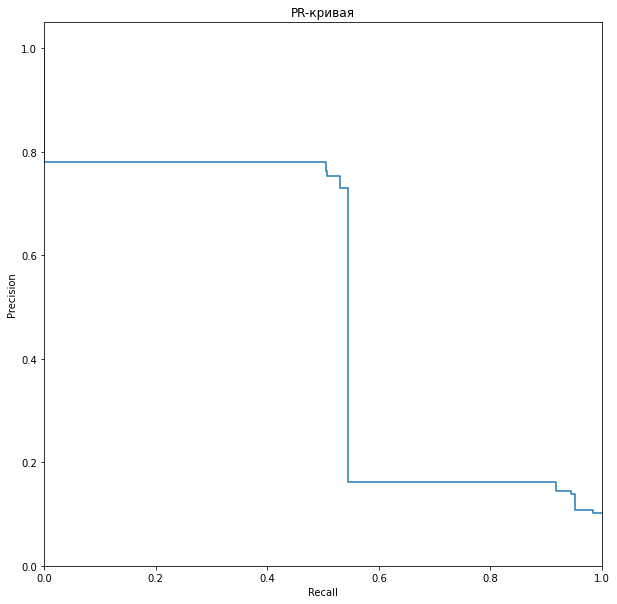

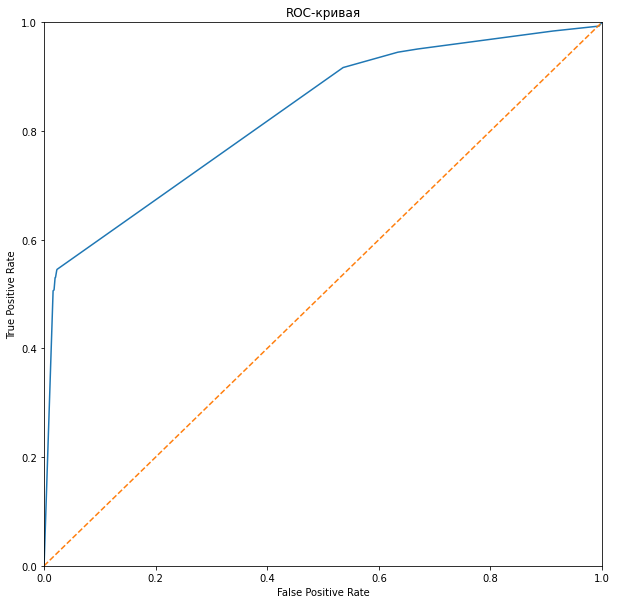

In [48]:
# вызовем функцию для подбора порога и построения PR-кривой и ROC-кривой
ml_threshold(grid_model_dt, [features_valid, target_valid], f1_score_list, threshold_list)

#### RandomForestClassifier

Подберем оптимальные гиперпараметры для модели случайного леса, будем менять гиперпараметры следующим образом:
    - с количеством деревьев: от 10 до 100 с шагом 30 (n_estimators),
    - с максимальной глубиной: от 1 до 20 (max_depth).

In [50]:
%%time
# рассчитаем модель логистической регрессии на уменьшенной выборке
# инициализация параметров для GridSearchCV
params_rf = {"classification__max_depth": range(1,21),
            "classification__n_estimators": range(10,101,30)}
model_rf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=list(stopwords))),
    ('random_under_sampler', RandomUnderSampler(random_state=MY_RANDOM_STATE)),
    ('classification', RandomForestClassifier(random_state=MY_RANDOM_STATE))
])
# запускаем функцию для подбора гиперпараметров и обучения модели
grid_model_rf = training(model_rf, params_rf, features_train, target_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3] END classification__max_depth=1, classification__n_estimators=10;, score=0.195 total time=   4.1s
[CV 2/3] END classification__max_depth=1, classification__n_estimators=10;, score=0.226 total time=   4.2s
[CV 3/3] END classification__max_depth=1, classification__n_estimators=10;, score=0.206 total time=   4.2s
[CV 1/3] END classification__max_depth=1, classification__n_estimators=40;, score=0.237 total time=   4.4s
[CV 2/3] END classification__max_depth=1, classification__n_estimators=40;, score=0.253 total time=   4.4s
[CV 3/3] END classification__max_depth=1, classification__n_estimators=40;, score=0.229 total time=   4.4s
[CV 1/3] END classification__max_depth=1, classification__n_estimators=70;, score=0.273 total time=   4.6s
[CV 2/3] END classification__max_depth=1, classification__n_estimators=70;, score=0.268 total time=   4.4s
[CV 3/3] END classification__max_depth=1, classification__n_estimators=70;, score=

Подберем порог.

Статистика модели
Порог = 0.00 | F1-мера = 0.184
Порог = 0.02 | F1-мера = 0.184
Порог = 0.04 | F1-мера = 0.184
Порог = 0.06 | F1-мера = 0.184
Порог = 0.08 | F1-мера = 0.184
Порог = 0.10 | F1-мера = 0.185
Порог = 0.12 | F1-мера = 0.185
Порог = 0.14 | F1-мера = 0.185
Порог = 0.16 | F1-мера = 0.185
Порог = 0.18 | F1-мера = 0.186
Порог = 0.20 | F1-мера = 0.187
Порог = 0.22 | F1-мера = 0.187
Порог = 0.24 | F1-мера = 0.188
Порог = 0.26 | F1-мера = 0.189
Порог = 0.28 | F1-мера = 0.190
Порог = 0.30 | F1-мера = 0.192
Порог = 0.32 | F1-мера = 0.194
Порог = 0.34 | F1-мера = 0.198
Порог = 0.36 | F1-мера = 0.202
Порог = 0.38 | F1-мера = 0.208
Порог = 0.40 | F1-мера = 0.216
Порог = 0.42 | F1-мера = 0.228
Порог = 0.44 | F1-мера = 0.246
Порог = 0.46 | F1-мера = 0.271
Порог = 0.48 | F1-мера = 0.313
Порог = 0.50 | F1-мера = 0.381
Порог = 0.52 | F1-мера = 0.491
Порог = 0.54 | F1-мера = 0.652
Порог = 0.56 | F1-мера = 0.524
Порог = 0.58 | F1-мера = 0.339
Порог = 0.60 | F1-мера = 0.188
Порог = 0.62 | F1-мер

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined a

Порог = 0.74 | F1-мера = 0.000
Порог = 0.76 | F1-мера = 0.000
Порог = 0.78 | F1-мера = 0.000
Порог = 0.80 | F1-мера = 0.000
Порог = 0.82 | F1-мера = 0.000
Порог = 0.84 | F1-мера = 0.000
Порог = 0.86 | F1-мера = 0.000
Порог = 0.88 | F1-мера = 0.000

Лучшие оценки модели
F1: 0.6516
AUC-ROC: 0.8939
Лучшее значение порога: 0.54
________________________________________




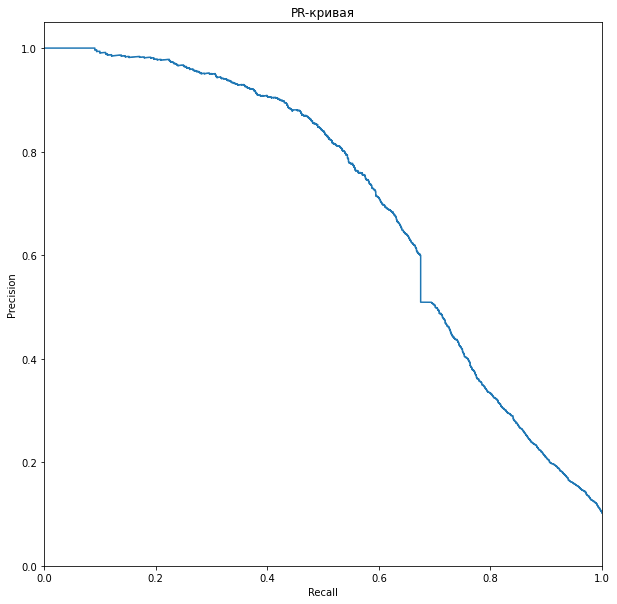

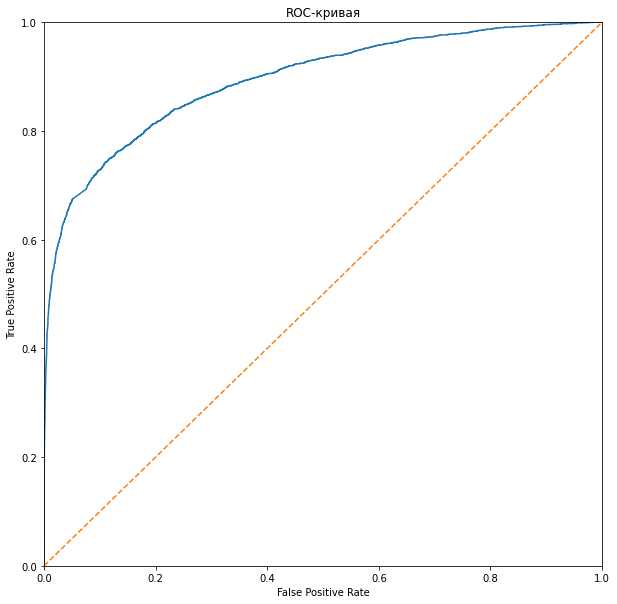

In [51]:
# вызовем функцию для подбора порога и построения PR-кривой и ROC-кривой
ml_threshold(grid_model_rf, [features_valid, target_valid], f1_score_list, threshold_list)

#### LightGBM

Перейдем к моделям с градиентным бустингом. Для LightGBM рассмотрим следующие гиперпараметры:
- для `num_leaves` три значения: 70, 100, 150;
- `max_depth`: 25, 50, 75;
- `n_estimators`: 100,200;
- `learning_rate`: 0.05,0.1,0.2. 

Найдем оптимальные гиперпараметры с помощью GridSearchCV.

In [53]:
%%time
# рассчитаем модель логистической регрессии на уменьшенной выборке
# инициализация параметров для GridSearchCV
params_lgbmr = {"classification__max_depth": [25, 50, 75],
                "classification__n_estimators": [100, 200],
                "classification__num_leaves": [70, 100, 150],
                "classification__learning_rate": [0.05, 0.1, 0.2]}
model_lgbmr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=list(stopwords))),
    ('random_under_sampler', RandomUnderSampler(random_state=MY_RANDOM_STATE)),
    ('classification', LGBMClassifier(random_state=MY_RANDOM_STATE))
])
# запускаем функцию для подбора гиперпараметров и обучения модели
grid_model_lgbmr = training(model_lgbmr, params_lgbmr, features_train, target_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END classification__learning_rate=0.05, classification__max_depth=25, classification__n_estimators=100, classification__num_leaves=70;, score=0.707 total time=  17.6s
[CV 2/3] END classification__learning_rate=0.05, classification__max_depth=25, classification__n_estimators=100, classification__num_leaves=70;, score=0.704 total time=  17.9s
[CV 3/3] END classification__learning_rate=0.05, classification__max_depth=25, classification__n_estimators=100, classification__num_leaves=70;, score=0.719 total time=  18.6s
[CV 1/3] END classification__learning_rate=0.05, classification__max_depth=25, classification__n_estimators=100, classification__num_leaves=100;, score=0.707 total time=  20.5s
[CV 2/3] END classification__learning_rate=0.05, classification__max_depth=25, classification__n_estimators=100, classification__num_leaves=100;, score=0.694 total time=  20.3s
[CV 3/3] END classification__learning_rate=0.05, classif

Подберем оптимальный порог.

Статистика модели
Порог = 0.00 | F1-мера = 0.184
Порог = 0.02 | F1-мера = 0.186
Порог = 0.04 | F1-мера = 0.193
Порог = 0.06 | F1-мера = 0.203
Порог = 0.08 | F1-мера = 0.214
Порог = 0.10 | F1-мера = 0.228
Порог = 0.12 | F1-мера = 0.242
Порог = 0.14 | F1-мера = 0.258
Порог = 0.16 | F1-мера = 0.272
Порог = 0.18 | F1-мера = 0.287
Порог = 0.20 | F1-мера = 0.303
Порог = 0.22 | F1-мера = 0.317
Порог = 0.24 | F1-мера = 0.333
Порог = 0.26 | F1-мера = 0.352
Порог = 0.28 | F1-мера = 0.372
Порог = 0.30 | F1-мера = 0.390
Порог = 0.32 | F1-мера = 0.409
Порог = 0.34 | F1-мера = 0.431
Порог = 0.36 | F1-мера = 0.456
Порог = 0.38 | F1-мера = 0.489
Порог = 0.40 | F1-мера = 0.630
Порог = 0.42 | F1-мера = 0.659
Порог = 0.44 | F1-мера = 0.680
Порог = 0.46 | F1-мера = 0.698
Порог = 0.48 | F1-мера = 0.714
Порог = 0.50 | F1-мера = 0.721
Порог = 0.52 | F1-мера = 0.730
Порог = 0.54 | F1-мера = 0.736
Порог = 0.56 | F1-мера = 0.738
Порог = 0.58 | F1-мера = 0.741
Порог = 0.60 | F1-мера = 0.743
Порог = 0.62 | F1-мер

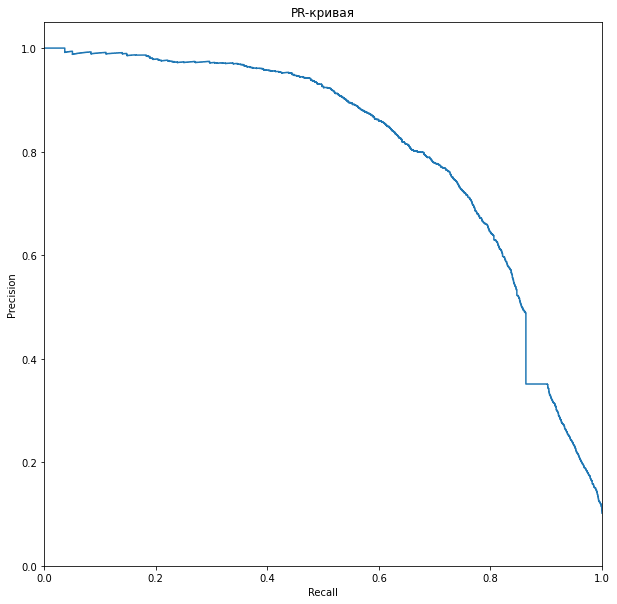

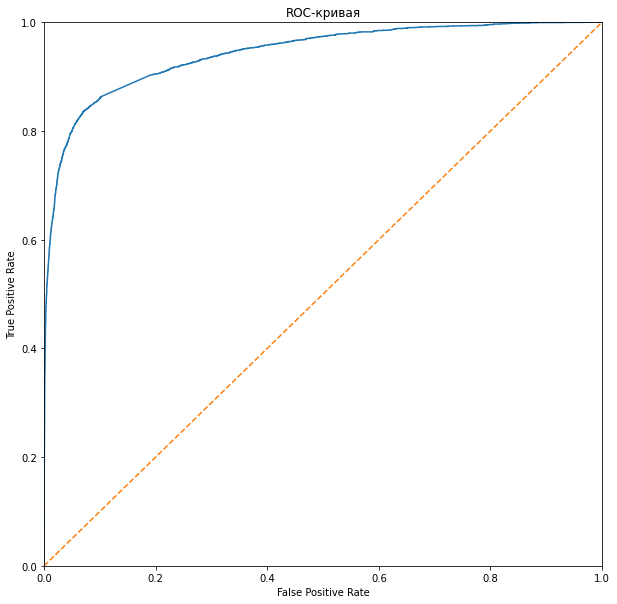

In [54]:
# вызовем функцию для подбора порога и построения PR-кривой и ROC-кривой
ml_threshold(grid_model_lgbmr, [features_valid, target_valid], f1_score_list, threshold_list)

### Выбор модели

Для тестирования выберем наилучшую модель - для этого построим таблицу по полученным метрикам.

In [55]:
# сформируем сводную таблицу по F1-мере для всех моделей
# составим список обученных моделей
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'LightGBM']
score_table_f1 = pd.DataFrame(
    {'Модель': model_names, 
     'Метрика F1': f1_score_list, 
     'Оптимальный порог': threshold_list
    }
)               
score_table_f1

,Модель,Метрика F1,Оптимальный порог
0,LogisticRegression,0.7577,0.68
1,DecisionTreeClassifier,0.6235,0.86
2,RandomForestClassifier,0.6516,0.54
3,LightGBM,0.7427,0.60


Видим, что наилучшее значение F1 метрики показала модель логистической регрессии - `LogisticRegression` (0.7577 на валидационной выборке) при пороге в 0.68.

**Выводы:**
1. Данные были поделены на 3 выборки с учётом стратификации: тренировочную, валидационную и тестовую в соотношении 3:1:1.
2. Была произведена балансировка классов методом `Downsample`, параметр `frac` был выбран - 0.12.
3. Текст был очищен от посторонних символов и проведена лемматизация с помощью библиотеки `spaCy`, так же были удалены стоп-слова.
4. Была посчитана величина TF-IDF для текстов.
5. Были обучены 4 модели, подобраны гиперпараметры и оптимальный порог. Наилучшие результаты:
    - `LogisticRegression`: F1=0.7577 при пороге 0.68;
    - `DecisionTreeClassifier` с гиперпараметром max_depth=18: F1=0.6235 при пороге 0.86;
    - `RandomForestClassifier` с гиперпараметрами max_depth=20, n_estimators=100: F1=0.6516 при пороге 0.54;
    - `LightGBM` с гиперпараметрами num_leaves=70, max_depth=25, learning_rate=0.05, n_estimators=100: F1=0.7427 при пороге 0.6.
6. Таким образом, наилучшие резултаты показала модель `LogisticRegression`, теперь протестируем ее. 

## Тестирование модели

В предыдущем разделе была выбрана наилучшая модель, проверим ее на тестовой выборке.

In [59]:
%%time
predicted_test = grid_model_lr.predict(features_test) # делаем предсказания
# считаем f1
f1_test = f1_score(target_test, predicted_test)
print(f1_test)

0.7017189079878665
CPU times: user 1.26 s, sys: 4.05 ms, total: 1.26 s
Wall time: 1.26 s


Вычислим F1 метрику при найденном на валидационной выборке оптимальном пороге - 0.82.

In [60]:
predictions = grid_model_lr.predict_proba(features_test)# найдем вероятности классов
probabilities_one_test = predictions[:, 1] # вероятность положительного класса
predicted_test = probabilities_one_test > 0.68 # находим вероятности больше порога
# вычисляем метрики
precision = precision_score(target_test, predicted_test)
recall = recall_score(target_test, predicted_test)
result = f1_score(target_test, predicted_test)
print('Точность = {:.3f}, Полнота = {:.3f} | F1-мера = {:.3f}'.format(precision, recall, result))

Точность = 0.792, Полнота = 0.730 | F1-мера = 0.760


Модель удовлетворяет требованиям к F1 метрике - не меньше 0.75. 

**Выводы:** 
1. Наилучшая модель `LogisticRegression` была проверена на тестовых данных: F1=0.7017.
2. Так как на валидационной выборке было выяснено, что оптимальный порог для модель - 0.68, мы посчитали F1 при таком оптимальном пороге: F1=0.76.

## Выводы

1. Мы провели обзор и предобработку данных: был выявлен дисбаланс классов (объектов положительного класса всего 10% от всей выборки),  дубликатов, отрицательных значений, пропусков не обнаружено. Для балансировки классов была использована `imblearn` Текст был очищен от посторонних символов и проведена лемматизация с помощью библиотеки `spaCy`, так же были удалены стоп-слова.
2. Целевым признаком определили данные по классификации текстов - `toxic`. Разбили данные на 3 выборки в соотношении 3:1:1 - обучающую, валидационную и тестовую. Данные были разбиты с учетом стратификации - случайного выбора объектов.
3. Были подготовлены признаки к обучению моделей - для классификации текста были применены величины TF-IDF как признаки;
4. Задача была определена, как бинарная классификация. Для решения задачи были применены и исследованы четыре варианта моделирования: дерево решений, случайный лес, логистическая регрессия, градиентный бустинг. Были подобраны оптимальные гиперпараметры и порог:
- модель `Logistic Regression` была проанализирована в одном варианте. Модель логистической регрессии в этой задаче показала самые лучшие результаты: на валидационной выборке F1 = 0.7577 при пороге 0.68;
- для моделей `Decision Tree` были проанализированы 20 вариантов: с гиперпараметром `max_depth` - максимальная глубина дерева - от 1 до 20. Наилучший результат модель случайного леса на валиадционной выборке показала при гиперпараметрах 'max_depth'=18 и при пороге 0.86: F1 = 0.6235;
- для моделей `Random Forest` было проанализировано 80 вариантов: с гиперпараметром `n_estimators` - количество деревьев - от 10 до 100 с шагом 30, и гиперпараметром `max_depth` - максимальная глубина - от 1 до 20. Наилучший результат модель случайного леса на валидационной выборке показала при гиперпараметрах 'max_depth'=20, 'n_estimators'=100 и пороге 0.54:  F1 = 0.6516;
- для моделей `LightGBM` было проанализировано 54 варианта: с гиперпараметрами для `num_leaves` - 70, 100, 150, `max_depth` - 25, 50, 75, `n_estimators` - 100,200, `learning_rate` - 0.05,0.1,0.2. Наилучший результат модель градиентного бустинга на валидационной выборке показала при гиперпараметрах 'learning_rate'=0.05, 'max_depth'=25, 'n_estimators'=100, 'num_leaves'=70 и пороге 0.6:  F1 = 0.7427.
5. Самые хорошие результаты показала модель `Logistic Regression` при пороге 0.68: F1=0.7577.
6. Эта же наилучшая модель на тестовых данных показала F1= 0.76 при оптимальном пороге 0.68.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны